  # Projet de reconnaissance de la parole: smart voice typing (svt)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/

/content/drive


In [3]:
cd MyDrive/

/content/drive/MyDrive


In [4]:
cd Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [5]:
!pip install jiwer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.9 MB/s eta 0:00:00


# **Bibliothèque:**


1-pandas est une bibliothèque pour la manipulation des données, utilisée pour créer, gérer et analyser des tableaux de données.

2-numpy est une bibliothèque pour le calcul scientifique en Python, utilisée pour effectuer des opérations mathématiques sur des tableaux et des matrices.

3-tensorflow est une bibliothèque de traitement en profondeur qui permet de construire des modèles de machine learning pour l'apprentissage supervisé et non supervisé.

4-keras est une interface de haut niveau pour la construction de modèles de machine learning dans TensorFlow.

5-layers est un sous-module de Keras qui contient les couches de réseau neuronal les plus couramment utilisées, comme les couches de densité et de convolution.

6-ctc_batch_cost est une fonction de coût CTC (Connectionist Temporal Classification) pour l'entraînement de réseaux de neurones pour la reconnaissance de la parole.

7-matplotlib.pyplot est une bibliothèque pour tracer des graphiques en Python.

8-IPython.display est une bibliothèque pour afficher des sorties dans le carnet Jupyter.

9-jiwer est une bibliothèque pour calculer le taux d'erreur de mots (WER) entre deux chaînes de texte.

10-re est une bibliothèque pour les expressions régulières, utilisée pour effectuer des opérations de recherche et de substitution sur des chaînes de texte.

11-scipy.signal.wiener est une fonction pour effectuer un filtrage de Wiener sur un signal.

12-scipy.signal est une bibliothèque pour le traitement du signal numérique en Python.

13-keras.utils est un module de Keras pour les opérations utilitaires, telles que la conversion d'étiquettes de texte en vecteurs binaires.

14-os est une bibliothèque pour les opérations système, comme la gestion de fichiers et de répertoires.

15-librosa est une bibliothèque pour l'analyse audio en Python, utilisée pour extraire des fonctionnalités audio à partir de fichiers audio.

16-librosa.display est un sous-module de librosa pour l'affichage de graphiques audio.

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.backend import ctc_batch_cost
import matplotlib.pyplot as plt
from IPython import display
from jiwer import wer
import re
from scipy.signal import wiener
import scipy.signal as signal
import keras.utils
import os
import librosa
import librosa.display

# Importation des données

Ces deux lignes de code téléchargent et décompressent un ensemble de données appelé LJSpeech-1.1 à partir de l'URL https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2.

La fonction keras.utils.get_file est utilisée pour télécharger des fichiers à partir d'URLs. Elle prend en entrée trois arguments : le nom du fichier, l'URL du fichier et l'indicateur untar qui indique si le fichier téléchargé doit être décompressé (si la valeur est True) ou non (si la valeur est False).

Dans ce cas, le nom du fichier est "LJSpeech-1.1", l'URL est "https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2" et l'indicateur untar est True, ce qui signifie que le fichier sera décompressé après avoir été téléchargé.

La variable data_path contiendra le chemin d'accès complet au fichier téléchargé et décompressé. Ce fichier contient des fichiers audio de voix humaine enregistrés en anglais, ainsi que leurs transcriptions textuelles correspondantes. Ces données sont couramment utilisées pour l'entraînement de modèles de reconnaissance de la parole.

In [7]:
data_url = "https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2"
data_path = keras.utils.get_file("LJSpeech-1.1", data_url, untar=True)

2748572632/2748572632 [==============================] - 32s 0us/step


Ces lignes de code définissent le chemin d'accès aux fichiers audio (dans le dossier wavs/ du répertoire data_path) et le chemin d'accès au fichier CSV contenant les transcriptions correspondantes (dans le fichier metadata.csv du répertoire data_path).

La variable wavs_path contient donc le chemin d'accès complet au dossier contenant les fichiers audio. La variable metadata_path contient le chemin d'accès complet au fichier CSV contenant les transcriptions.

La fonction pd.read_csv est utilisée pour lire le fichier CSV et stocker son contenu dans un objet appelé metadata_df. Les arguments passés à la fonction spécifient le chemin d'accès au fichier (metadata_path), le séparateur de champ (sep), qui est le symbole "|" dans ce cas, l'absence d'en-tête (header=None), et la façon dont les guillemets sont gérés (quoting=3 signifie que tous les guillemets sont ignorés).

La méthode head() est ensuite appelée sur l'objet metadata_df pour afficher les 10 premières lignes du tableau de données. Ces lignes contiennent les transcriptions textuelles correspondant aux fichiers audio dans le dossier wavs/. Chaque ligne contient deux colonnes : la première colonne est le nom de fichier du fichier audio et la deuxième colonne est la transcription textuelle correspondante.

on a pris 1000 audios de type WAV.

In [8]:
wavs_path = data_path + "/wavs/"
metadata_path = data_path + "/metadata.csv"
#lire les bases de données file and parse it
metadata_df = pd.read_csv(metadata_path, sep="|", header=None, quoting=3, nrows=5000)
metadata_df.head(10)

,0,1,2
0,LJ001-0001,"Printing, in the only sense with which we are ...","Printing, in the only sense with which we are ..."
1,LJ001-0002,in being comparatively modern.,in being comparatively modern.
2,LJ001-0003,For although the Chinese took impressions from...,For although the Chinese took impressions from...
3,LJ001-0004,"produced the block books, which were the immed...","produced the block books, which were the immed..."
4,LJ001-0005,the invention of movable metal letters in the ...,the invention of movable metal letters in the ...
5,LJ001-0006,"And it is worth mention in passing that, as an...","And it is worth mention in passing that, as an..."
6,LJ001-0007,"the earliest book printed with movable types, ...","the earliest book printed with movable types, ..."
7,LJ001-0008,has never been surpassed.,has never been surpassed.
8,LJ001-0009,"Printing, then, for our purpose, may be consid...","Printing, then, for our purpose, may be consid..."
9,LJ001-0010,"Now, as all books not primarily intended as pi...","Now, as all books not primarily intended as pi..."


Ces lignes de code effectuent plusieurs transformations sur le tableau de données metadata_df.

La première ligne renomme les colonnes du tableau de données pour les rendre plus explicites. La colonne d'origine contenant la transcription textuelle est renommée en "normalized_transcription".

La deuxième ligne de code sélectionne les colonnes "file_name" et "normalized_transcription" du tableau de données. Les autres colonnes, y compris la colonne "transcription" qui n'est plus utile puisqu'elle a été renommée, sont supprimées.

La troisième ligne mélange aléatoirement les lignes du tableau de données en utilisant la méthode sample de Pandas. La valeur de l'argument frac est fixée à 1, ce qui signifie que toutes les lignes sont conservées, mais elles sont réarrangées de manière aléatoire. La méthode reset_index est ensuite appelée pour réinitialiser les index des lignes du tableau de données.

La dernière ligne de code affiche les trois premières lignes du tableau de données, après les transformations appliquées. Ce tableau de données contient les noms de fichiers des fichiers audio et les transcriptions textuelles correspondantes, dans un ordre aléatoire.

In [9]:
metadata_df.columns = ["file_name", "transcription", "normalized_trancription"]
metadata_df = metadata_df[["file_name", "normalized_trancription"]]
metadata_df = metadata_df.sample(frac=1).reset_index(drop=True)
metadata_df.head(3)

,file_name,normalized_trancription
0,LJ006-0274,Perhaps the worst feature of the visiting syst...
1,LJ007-0020,"""swearing and talking of what crimes they had ..."
2,LJ009-0067,The service proceeds. At last the burial servi...


# Prétraitement des données

Cet algorithme de nettoyage est utilisé pour nettoyer les données dans le DataFrame metadata_df en éliminant les lignes avec des valeurs manquantes ou aberrantes. Les différentes étapes sont les suivantes :

1-Le fichier CSV est lu en spécifiant le séparateur de champ ("|") et les noms de colonnes ("file_name" et "normalized_transcription").

2-Les statistiques descriptives du DataFrame sont affichées à l'aide de la méthode describe() pour vérifier s'il y a des valeurs manquantes ou aberrantes.

3-Les lignes avec des valeurs manquantes sont supprimées à l'aide de la méthode dropna().

4-Les lignes avec des valeurs aberrantes sont supprimées en appliquant une fonction lambda à la colonne "normalized_transcription". La fonction lambda renvoie True si la longueur de la chaîne de caractères est inférieure à 150, sinon elle renvoie False. Cela signifie que seules les lignes dont la longueur de la transcription textuelle est inférieure à 150 caractères sont conservées.

5-Les statistiques descriptives du DataFrame sont de nouveau affichées pour vérifier les changements après la suppression des lignes.

Les résultats des différentes étapes sont affichés à l'aide des fonctions print() pour permettre une vérification de l'efficacité de chaque étape de nettoyage

In [ ]:
#Algorithme de nettoyage
# Lire le fichier CSV en spécifiant le séparateur et les noms de colonnes
metadata_df = pd.read_csv(metadata_path, sep="|", header=None, quoting=3, names=["file_name", "normalized_transcription"])

# Vérifier les statistiques descriptives du DataFrame pour s'assurer qu'il n'y a pas de valeurs manquantes
print(metadata_df.describe())

# Vérifier s'il y a des valeurs nulles dans le DataFrame
print(metadata_df.isnull().sum())

# Supprimer les lignes avec des valeurs nulles ou aberrantes
metadata_df = metadata_df.dropna() # Supprimer les lignes avec des valeurs nulles
metadata_df = metadata_df[metadata_df["normalized_transcription"].apply(lambda x: len(x) < 150)] # Supprimer les lignes avec des valeurs aberrantes (longueur de la deuxième colonne > 150)

# Vérifier les statistiques descriptives du DataFrame après la suppression
print(metadata_df.describe())

                                                file_name  \
count                                               13100   
unique                                              13074   
top     Report of the President's Commission on the As...   
freq                                                   12   

                                 normalized_transcription  
count                                               13100  
unique                                              13074  
top     Report of the President's Commission on the As...  
freq                                                   12  
file_name                   0
normalized_transcription    0
dtype: int64
                                                file_name  \
count                                               12348   
unique                                              12333   
top     Report of the President's Commission on the As...   
freq                                                    8   

               

La fonction dtypes est utilisée pour afficher le type de données de chaque colonne dans le DataFrame metadata_df. Cette information est utile pour vérifier si les types de données sont appropriés pour les opérations futures, telles que l'entraînement d'un modèle de reconnaissance de la parole.

Pour exécuter la fonction, vous pouvez simplement taper metadata_df.dtypes dans la console ou le script. Cela affichera le type de données de chaque colonne.

In [ ]:
metadata_df.dtypes

file_name                  object
normalized_trancription    object
dtype: object

Dans ce code, nous divisons un dataframe metadata_df en deux ensembles de données pour l'entraînement et la validation. Nous commençons par déterminer l'indice de la séparation, qui correspond à 90% de la longueur totale du dataframe metadata_df. Nous utilisons cet indice pour diviser le dataframe en deux sous-ensembles, df_train et df_val, contenant respectivement les 90% premières et les 10% dernières lignes de metadata_df.

Ensuite, nous affichons la taille de chaque sous-ensemble en utilisant la fonction len, qui retourne le nombre de lignes dans chaque dataframe. Nous affichons la taille de df_train en utilisant len(df_train) et la taille de df_val en utilisant len(df_val). Ces deux tailles sont affichées à l'écran à l'aide de la fonction print.





In [10]:
split = int(len(metadata_df) * 0.90)
df_train = metadata_df[:split]
df_val = metadata_df[split:]
print(f"size of the training set: {len(df_train)}")
print(f"size of the training set: {len(df_val)}")

size of the training set: 4500
size of the training set: 500


# Segmentation et extraction de caractéristique

Le code fourni utilise la bibliothèque Keras pour créer deux couches de transformation de chaînes de caractères en entiers et inversement. Plus précisément, il crée une couche de transformation de caractères en entiers (char_to_num) et une couche de transformation inverse d'entiers en caractères (num_to_char).

Les étapes du code sont les suivantes:

Définition de l'ensemble de caractères autorisés pour la transcription, qui est une liste de toutes les lettres de l'alphabet en minuscules, ainsi que les caractères apostrophe, point d'exclamation, point d'interrogation et espace.

Utilisation de la couche StringLookup de Keras pour mapper chaque caractère de la liste characters à un entier unique. Cette couche utilise le paramètre vocabulary pour spécifier l'ensemble de caractères et le paramètre oov_token pour spécifier la valeur à utiliser pour les caractères qui ne sont pas présents dans l'ensemble.

Création d'une deuxième couche StringLookup pour inverser la première couche, c'est-à-dire pour mapper les entiers d'origine de nouveau aux caractères correspondants.

Impression du vocabulaire créé par la première couche, qui est une liste de tous les caractères autorisés ainsi que la valeur de oov_token, suivi de la taille du vocabulaire.

En résumé, ce code crée deux couches de transformation de chaînes de caractères en entiers et inversement, et définit un vocabulaire d'entrée pour la première couche basé sur un ensemble de caractères donné.

In [11]:
#The set of caracters accepted in the transcription
characters = [x for x in "abcdefghijklmnopqrstuvwxyz'?! "]
# Mapping characters to integers 
char_to_num = keras.layers.StringLookup(vocabulary=characters, oov_token="")
# Mapping integers back to original characters
num_to_char = keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)
print(
    f"The vocabulary is: {char_to_num.get_vocabulary()}"
    f"size ={char_to_num.vocabulary_size()}"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', ' ']size =31


Ce code est une fonction encode_single_sample qui encode un échantillon audio et sa transcription en spectogramme et en séquence d'entiers respectivement.

La fonction prend en entrée le chemin vers le fichier audio (au format WAV) et sa transcription, et elle retourne un dictionnaire contenant les données encodées. Le traitement des données est effectué en plusieurs étapes:

1-Lecture du fichier audio à partir de son chemin

2-Décode le fichier audio WAV en un tenseur audio

3-Conversion du type de données audio en float32

4-Calcul du spectogramme à l'aide de la transformée de Fourier à court terme (STFT)

5-Extraction de la magnitude en utilisant la fonction tf.abs

6-Normalisation des données

7-Conversion de la transcription en minuscules

8-Division de la transcription en caractères individuels à l'aide de tf.strings.unicode_split

9-Conversion de chaque caractère de la transcription en un entier à l'aide de la table de correspondance char_to_num

10-Retourne un dictionnaire contenant les données d'entrée encodées (spectogramme) et les étiquettes encodées (séquence d'entiers)

En somme, cette fonction réalise la conversion d'un fichier audio et de sa transcription en des données prêtes à être utilisées pour entraîner un modèle de traitement automatique de la parole.

In [12]:
# An integer scalar Tensor. The window length in samples
frame_length = 256
# An integer scalar Tensor. The window length in samples to step
frame_step = 160
# An integer scalar Tensor. The size of the FFT to apply
# If not provided, uses the smallest power of 2 enclosing frame_length.
fft_length = 384
def encode_single_sample(wav_file, label):
  #########################################################################
  ## Process the Audio
  #########################################################################
  # 1. Read wav file
  file = tf.io.read_file(wavs_path + wav_file + ".wav")
  # 2. Decode the wav file
  audio, _ = tf.audio.decode_wav(file)
  audio = tf.squeeze(audio, axis=-1)
  # 3. Change type to float
  audio = tf.cast(audio, tf.float32)
  # 4. Get the spectogram
  spectogram = tf.signal.stft(
      audio, frame_length=frame_length, frame_step=frame_step, fft_length=fft_length
  )
  # 5. We only need the maghnitude, which can be derived by applying tf.abs
  spectogram = tf.abs(spectogram)
  spectogram = tf.math.pow(spectogram, 0.5)
  # 6. normalisation
  means = tf.math.reduce_mean(spectogram, 1, keepdims=True)
  stddevs = tf.math.reduce_std(spectogram, 1, keepdims=True)
  spectogram = (spectogram - means) / (stddevs + 1e-10)
  ###############################################################
  ## Process the label
  ###############################################################
  # 7. Convert label to lower case
  label = tf.strings.lower(label)
  # 8. Split the label
  label = tf.strings.unicode_split(label, input_encoding="UTF-8")
  # 9. Map the caracters in label to numbers
  label = char_to_num(label)
  # 10. Return a dict as our model is excepting 2 inputs
  return spectogram, label

Dans ce code, les ensembles de données de formation et de validation sont définis à l'aide de la tf.data.Datasetclasse. Les deux ensembles de données sont créés en découpant les noms de fichiers et les transcriptions normalisées à partir de leurs dataframes respectifs ( df_trainet df_val).

La encode_single_samplefonction est appliquée à chaque élément de l'ensemble de données pour prétraiter les données audio et d'étiquette. Le num_parallel_callsparamètre spécifie le nombre d'appels parallèles utilisés pour décoder les fichiers audio.

La padded_batchméthode est utilisée pour créer des lots de taille fixe (32 dans ce cas). Le rembourrage est ajouté pour que tous les éléments du lot aient la même forme. Ceci est nécessaire car l'entrée du réseau neuronal doit avoir une forme fixe.

La prefetchméthode est utilisée pour préextraire un certain nombre d'éléments de l'ensemble de données afin d'améliorer les performances. Le buffer_sizeparamètre spécifie le nombre d'éléments à prérécupérer. tf.data.AUTOTUNEest utilisé pour ajuster automatiquement ce paramètre à la valeur appropriée pour le système.

In [13]:
batch_size = 8
# define the training dataset
train_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_train["file_name"]), list(df_train["normalized_trancription"]))
)
train_dataset = (
    train_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

#Define the validation dataset
validation_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_val["file_name"]), list(df_val["normalized_trancription"]))
)
validation_dataset = (
    validation_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

Il s'agit d'un extrait de code qui affiche un seul exemple d'un ensemble de données TensorFlow contenant des enregistrements audio et leurs étiquettes correspondantes. L'enregistrement audio est représenté sous la forme d'un spectrogramme, qui est une représentation visuelle du contenu fréquentiel du signal audio. Le code extrait d'abord un seul exemple de l'ensemble de données d'apprentissage à l'aide de la take()méthode. Il convertit ensuite le tenseur du spectrogramme en un tableau NumPy et supprime toutes les colonnes nulles à l'aide de trim_zeros(). L'étiquette est également extraite de l'exemple de tenseur et convertie en une représentation sous forme de chaîne.

Le code crée ensuite une figure Matplotlib avec deux sous-parcelles. La première sous-parcelle affiche le spectrogramme en utilisant imshow()la méthode de Matplotlib, et l'étiquette est définie comme titre. La deuxième sous-parcelle affiche la forme d'onde du signal audio en utilisant plot()la méthode de Matplotlib. La xlim()méthode est utilisée pour fixer les limites de l'axe x à la longueur du signal audio. La display.Audio()méthode est utilisée pour lire l'enregistrement audio dans le bloc-notes. Enfin, la figure est affichée à l'aide de plt.show()

[[-0.8328102   0.20700303 -0.3807454  ... -0.6271595   1.1574986
   1.3263798 ]
 [ 0.1181757   0.4578558   0.06699296 ...  1.6059648   2.2774475
   2.0394254 ]
 [ 0.3679423   1.2414414  -0.0160689  ...  1.8664904   2.8542774
   2.537252  ]
 ...
 [-1.5196815  -1.517466   -1.3698202  ... -1.1579152  -1.1357756
  -1.1110107 ]
 [-1.4829202  -1.5672567  -1.4013643  ... -1.1859818  -1.161443
  -1.1286342 ]
 [-1.4899187  -1.6098886  -1.4620068  ... -1.2400652  -1.219352
  -1.0939189 ]]


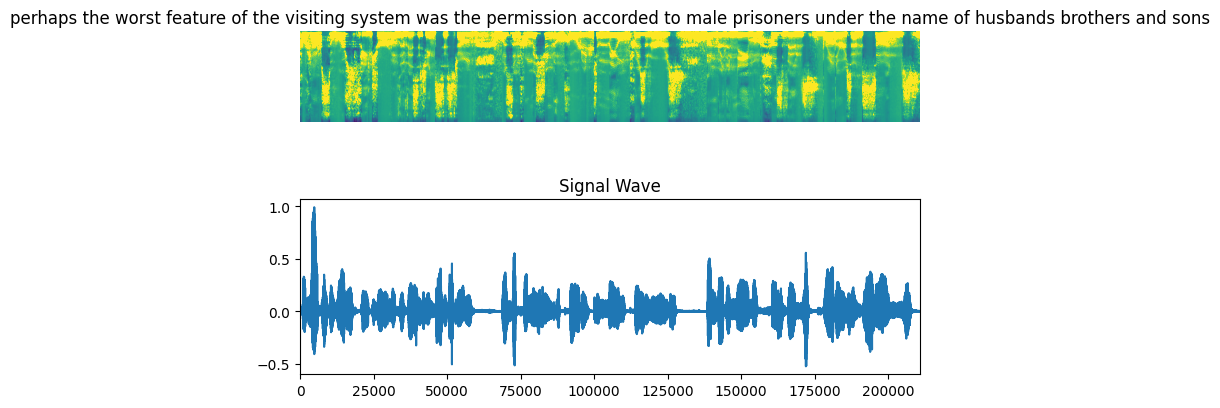

In [14]:
fig = plt.figure(figsize=(8, 5))
for batch in train_dataset.take(1):
  spectogram = batch[0][0].numpy()
  spectogram = np.array([np.trim_zeros(x) for x in np.transpose(spectogram)])
  label = batch[1][0]
  print(spectogram)
  #spectogram
  label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("UTF-8")
  ax = plt.subplot(2, 1, 1)
  ax.imshow(spectogram, vmax=1)
  ax.set_title(label)
  ax.axis("off")
  #wav
  file = tf.io.read_file(wavs_path + list(df_train["file_name"])[0] + ".wav")
  audio, _ = tf.audio.decode_wav(file)
  audio = audio.numpy()
  ax = plt.subplot(2, 1, 2)
  plt.plot(audio)
  ax.set_title("Signal Wave")
  ax.set_xlim(0, len(audio))
  display.display(display.Audio(np.transpose(audio), rate=16000))
  plt.show()

Il s'agit d'une fonction TensorFlow permettant de calculer la perte de classification temporelle connexionniste (CTC) entre les étiquettes réelles y_trueet les étiquettes prédites y_pred. CTC est une fonction de perte populaire utilisée pour les tâches de prédiction de séquence, telles que la reconnaissance vocale ou la reconnaissance de l'écriture manuscrite.

La fonction calcule d'abord la taille du lot batch_len, la longueur d'entrée input_lengthet la longueur de l'étiquette label_length. Ensuite, il crée deux tenseurs de la même forme que l'entrée, input_lengthet label_length, et les remplit avec les valeurs correspondantes. Enfin, il utilise la ctc_batch_costfonction du backend Keras pour calculer la perte CTC entre les étiquettes vraies et prédites.

Notez que tf.castest utilisé pour convertir les formes de tenseur en int64type de données.

In [15]:
def CTCLoss(y_true, y_pred):
  # Compute the training-time loss value
  batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
  input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
  label_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")

  input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
  label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

  loss = keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
  return loss

# Modéle de reconnaissance vocale:

Ce code définit une fonction build_modelqui construit un modèle de reconnaissance vocale similaire à DeepSpeech2 à l'aide de l'API Keras dans TensorFlow. Le modèle consiste en un réseau neuronal convolutif (CNN) suivi d'une série de couches de réseau neuronal récurrent (RNN) et d'une couche de classification. L'architecture du modèle peut être résumée comme suit :

-L'entrée est un spectrogramme d'un clip audio avec une forme (batch_size, time_steps, fft_length // 2 + 1)où fft_lengthest la longueur de la transformée de Fourier rapide (FFT) appliquée à la forme d'onde audio pour générer le spectrogramme.

-Le spectrogramme d'entrée est d'abord remodelé pour avoir une dimension supplémentaire pour utiliser le CNN 2D.

-Deux couches convolutionnelles sont appliquées avec ReLUactivation, normalisation par lots et régularisation des pertes.

-Le volume résultant est ensuite remodelé pour alimenter les couches RNN.
Une série de rnn_layerscouches bidirectionnelles Gated Recurrent Units (GRU) sont appliquées, où chaque couche a rnn_unitsdes unités avec ReLUune activation et un taux d'abandon de 0,5.

-Une couche dense est ensuite appliquée avec ReLUactivation et régularisation du dropout.

-Une couche de classification avec softmaxactivation est appliquée avec output_dim + 1des unités de sortie, où output_dimest le nombre de caractères du vocabulaire utilisé dans la tâche de reconnaissance vocale.

-La fonction de perte utilisée pour la formation est la perte de classification temporelle connexionniste (CTC), qui est couramment utilisée dans les tâches de reconnaissance vocale.

La build_modelfonction prend trois arguments :

-input_dim: la dimension du spectrogramme d'entrée.

-output_dim: le nombre de caractères du vocabulaire utilisé dans la tâche de reconnaissance vocale.

-rnn_layers: le nombre de couches RNN à utiliser dans le modèle. La valeur par défaut est 5.

-rnn_units: le nombre d'unités dans chaque couche RNN. La valeur par défaut est 128.

-La model.summary()fonction est utilisée pour imprimer le résumé du modèle, y compris les noms des couches, les formes de sortie et le nombre de paramètres pouvant être entraînés.

In [16]:
  def build_model(input_dim, output_dim, rnn_layers=5, rnn_units=128):
    """Model similar to DeepSpeech2"""
    # Model's input
    input_spectrogram = layers.Input((None, input_dim), name="input")
    # Expand the dimension to use 2D CNN
    x = layers.Reshape((-1, input_dim, 1), name="expand_dim")(input_spectrogram)
    # convolution layer 1
    x = layers.Conv2D(
        filters=32,
        kernel_size=[11, 41],
        strides=[2, 2],
        padding="same",
        use_bias=False,
        name="conv_1",
    )(x)
    x = layers.BatchNormalization(name="conv_1_bn")(x)
    x = layers.ReLU(name="conv_1_relu")(x)
    # convolution layer 2
    x = layers.Conv2D(
        filters=32,
        kernel_size=[11, 21],
        strides=[1, 2],
        padding="same",
        use_bias=False,
        name="conv_2",
    )(x)
    x = layers.BatchNormalization(name="conv_2_bn")(x)
    x = layers.ReLU(name="conv_2_relu")(x)
    # Reshape the resulted volume to feed the RNNs layers
    x = layers.Reshape((-1, x.shape[-2] * x.shape[-1]))(x)
    # RNN layers
    for i in range(1, rnn_layers + 1):
        recurrent = layers.GRU(
            units=rnn_units,
            activation="tanh",
            recurrent_activation="sigmoid",
            use_bias=True,
            return_sequences=True,
            reset_after=True,
            name=f"gru_{i}",
        )
        x = layers.Bidirectional(
            recurrent, name=f"bidirectional_{i}", merge_mode="concat"
        )(x)
        if i < rnn_layers:
            x = layers.Dropout(rate=0.5)(x)
    # Dense layer
    x = layers.Dense(units=rnn_units * 2, name="dense_1")(x)
    x = layers.ReLU(name="dense_1_relu")(x)
    x = layers.Dropout(rate=0.5)(x)
    # Classification layer
    output = layers.Dense(units=output_dim + 1, activation="softmax")(x)
    # model
    model = keras.Model(input_spectrogram, output, name="DeepSpeech_2")
    # optimizer
    opt = keras.optimizers.Adam(learning_rate=1e-4)
    # compile the model and return
    model.compile(optimizer=opt, loss=CTCLoss)
    return model 


# Get the model
model = build_model(
    input_dim=fft_length // 2 + 1,
    output_dim=char_to_num.vocabulary_size(),
    rnn_units=512,
)
model.summary(line_length=110)

Model: "DeepSpeech_2"
______________________________________________________________________________________________________________
 Layer (type)                                    Output Shape                                Param #          
 input (InputLayer)                              [(None, None, 193)]                         0                
                                                                                                              
 expand_dim (Reshape)                            (None, None, 193, 1)                        0                
                                                                                                              
 conv_1 (Conv2D)                                 (None, None, 97, 32)                        14432            
                                                                                                              
 conv_1_bn (BatchNormalization)                  (None, None, 97, 32)                     

# Généralisation de texte

Ce code fournit deux choses : une fonction utilitaire pour décoder la sortie d'un réseau de neurones et une classe de rappel pour évaluer les performances du modèle pendant l'entraînement.

La decode_batch_predictionsfonction prend la sortie d'un réseau de neurones (qui doit être sous la forme d'une distribution de probabilité sur les caractères) et renvoie une liste de chaînes représentant le texte décodé. Pour ce faire, il utilise un décodeur CTC (Connectionist Temporal Classification), qui tient compte du fait que la séquence d'entrée (dans ce cas, la forme d'onde audio) et la séquence de sortie (la transcription) peuvent avoir des longueurs différentes. La fonction utilise une recherche gourmande pour trouver la transcription la plus probable pour chaque entrée.

La callbackEvalclasse est un rappel Keras qui est appelé après chaque époque de formation. Il prend un ensemble de données (vraisemblablement un ensemble de validation) et utilise la decode_batch_predictionsfonction pour générer des transcriptions pour chaque lot de l'ensemble de données. Il calcule ensuite le taux d'erreur de mot (WER) entre les transcriptions prédites et les véritables étiquettes, et imprime le WER avec quelques transcriptions aléatoires pour une inspection visuelle. WER est une métrique courante pour évaluer les performances des systèmes de reconnaissance vocale; il mesure le pourcentage de mots dans la transcription prédite qui diffèrent de la vraie transcription.

Dans l'ensemble, ce code est utile pour surveiller les performances d'un modèle de reconnaissance vocale pendant la formation et fournir des commentaires sur sa précision.

In [17]:
# A utility function to decode the output of the network
def decode_batch_predictions(pred):
  input_len = np.ones(pred.shape[0]) * pred.shape[1]
  # use greedy search. for complex tasks, you can use beam search
  results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0]
  # Iterate over the results and get back the text
  output_text = []
  for result in results:
    result = tf.strings.reduce_join(num_to_char(result)).numpy().decode("utf-8")
    output_text.append(result)
  return output_text


# A callback class to output a few transcriptions during training
class callbackEval(keras.callbacks.Callback):
      """Displays a batch of outputs after every epoch."""
      def __init__(self, dataset):
        super().__init__()
        self.dataset = dataset
      def on_epochs_end(self, epochs: int, logs=None):
        predictions = []
        targets = []
        for batch in self.dataset:
          X, y = batch
          batch_predictions = model.predict(X)
          batch_predictions = decode_batch_predictions(batch_predictions)
          predictions.extend(batch_predictions)
          for label in y:
            label = (
                tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
            )
            targets.append(label)
        wer_score = wer(targets, predictions)
        print("-" * 100)
        print(f"Word Error Rate: {wer_score:.4f}")
        print("-" * 100)
        for i in np.random.randint(0, len(predictions), 2):
          print(f"Target    : {targets[i]}")
          print(f"Predictions:  {predictions[i]}")
          print("-" * 100)

Cet extrait de code semble entraîner un modèle d'apprentissage automatique à l'aide de la fit()méthode fournie par certains frameworks d'apprentissage automatique (par exemple, TensorFlow, PyTorch, etc.). Voici ce qu'il fait :

epochs = 5définit le nombre d'époques d'apprentissage sur 5. Une époque est une itération complète sur l'ensemble de données d'apprentissage.
eval_callback = callbackEval(validation_dataset)crée une fonction de rappel eval_callbackutilisée pour évaluer les performances du modèle sur un ensemble de données de validation après chaque époque. Le validation_datasetest passé en argument à cette fonction.

model.fit()adapte le modèle aux données d'apprentissage. Le train_datasetest passé en argument à la méthode, avec le nombre d'époques à former ( epochs=5) et l'ensemble de données de validation ( validation_dataset). De plus, l' callbacksargument est passé, qui inclut le eval_callbackqui a été défini précédemment.

Dans l'ensemble, cet extrait de code forme un modèle d'apprentissage automatique pour 5 époques, en évaluant ses performances sur un ensemble de données de validation après chaque époque. Le eval_callbackpermet à l'utilisateur de surveiller les performances du modèle pendant l'entraînement.

In [19]:
# Define the number of epochs
epochs = 20
# Create a callback to display outputs during training
eval_callback = callbackEval(validation_dataset)
# Train the model
model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=validation_dataset,
    callbacks=[eval_callback]
)

Epoch 1/20
563/563 [==============================] - 978s 2s/step - loss: 268.5557 - val_loss: 206.4660
Epoch 2/20
563/563 [==============================] - 617s 1s/step - loss: 167.5298 - val_loss: 130.3766
Epoch 3/20
563/563 [==============================] - 578s 1s/step - loss: 123.7328 - val_loss: 102.9400
Epoch 4/20
563/563 [==============================] - 575s 1s/step - loss: 101.6693 - val_loss: 89.4883
Epoch 5/20
563/563 [==============================] - 573s 1s/step - loss: 86.5262 - val_loss: 78.2421
Epoch 6/20
563/563 [==============================] - 575s 1s/step - loss: 75.6945 - val_loss: 71.4141
Epoch 7/20
563/563 [==============================] - 573s 1s/step - loss: 66.7667 - val_loss: 66.0950
Epoch 8/20
563/563 [==============================] - 569s 1s/step - loss: 59.4535 - val_loss: 63.5351
Epoch 9/20
563/563 [==============================] - 569s 1s/step - loss: 53.3623 - val_loss: 61.1410
Epoch 10/20
563/563 [==============================] - 570s 1s/ste

Cet extrait de code semble évaluer les performances d'un modèle sur un jeu de données de validation à l'aide de la métrique WER (Word Error Rate).

Le code parcourt l'ensemble de données de validation, effectue des prédictions sur chaque lot à l'aide de la model.predictméthode, puis décode les prédictions en chaînes lisibles par l'homme à l'aide de la decode_batch_predictionsfonction. Les étiquettes réelles sont extraites yet converties en chaînes à l'aide de la num_to_charfonction.

Le score WER est calculé à l'aide de la werfonction et est imprimé sur la console. Ensuite, 5 échantillons aléatoires des prédictions sont sélectionnés et imprimés avec leurs cibles correspondantes.

Ce code peut être utile pour évaluer les performances d'un modèle sur un jeu de données de validation et identifier les erreurs ou les modèles dans les prédictions. Cependant, il convient de noter que la métrique WER n'est pas toujours la métrique la plus appropriée pour évaluer les performances d'un modèle de reconnaissance vocale, car elle peut ne pas capturer avec précision la qualité des transcriptions. D'autres mesures telles que le taux d'erreur de caractère (CER) ou le taux de reconnaissance de mots (WRR) peuvent également être utilisées



In [20]:
# Let's check results on more validation samples
predictions = []
targets = []
for batch in validation_dataset:
  X, y = batch
  batch_predictions = model.predict(X)
  batch_predictions = decode_batch_predictions(batch_predictions)
  predictions.extend(batch_predictions)
  for label in y:
    label_str = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
    targets.append(label_str)
wer_score = wer(targets, predictions)
print("-" * 100)
print(f"Word Error Rate: {wer_score:.4f}")
print("-" * 100)
for i in np.random.randint(0, len(predictions), 5):
  print(f"Target     : {targets[i]}")
  print(f"Prediction : {predictions[i]}")
  print("-" * 100)

1/1 [==============================] - 0s 164ms/step
----------------------------------------------------------------------------------------------------
Word Error Rate: 0.3036
----------------------------------------------------------------------------------------------------
Target     : the city authorities had endeavored to take all precautions against panic and excitement among the crowd
Prediction : the city of thorrity is had indevere take al procaustions ageinst paninc and itcintment a mong the crowd
----------------------------------------------------------------------------------------------------
Target     : at another time there were fifty one of whom had been under sentence a couple of years
Prediction : at another time there were fifty one of whom had been under sentence a couple of years
----------------------------------------------------------------------------------------------------
Target     : the officers dropped on to him while he was still in bed but as they c

# Preformance cible et predit

Ce code calcule les pourcentages de prédictions et de cibles correctes, puis crée un graphique à secteurs pour comparer les performances des cibles et des prédictions.

Le code commence par créer une liste correct_targets qui contient des 1 si la cible est égale à la prédiction correspondante, et des 0 sinon. La variable correct_percent_targets contient le pourcentage de cibles correctes, calculé en divisant le nombre total de cibles correctes par le nombre total de cibles, puis en multipliant par 100.

La variable correct_percent_predictions contient le pourcentage de prédictions correctes, qui a été calculé auparavant et stocké dans la variable wer_score.

Ensuite, le code crée un graphique à secteurs à l'aide de la fonction pie de Matplotlib. Les pourcentages de cibles correctes et de prédictions correctes sont passés sous forme de liste à la fonction, avec les étiquettes correspondantes. L'argument autopct='%1.1f%%' permet de spécifier le format de l'étiquette de chaque secteur en pourcentage avec une précision d'une décimale.

Enfin, le code définit le titre du graphique avec ax.set_title, puis affiche le graphique à l'aide de plt.show().

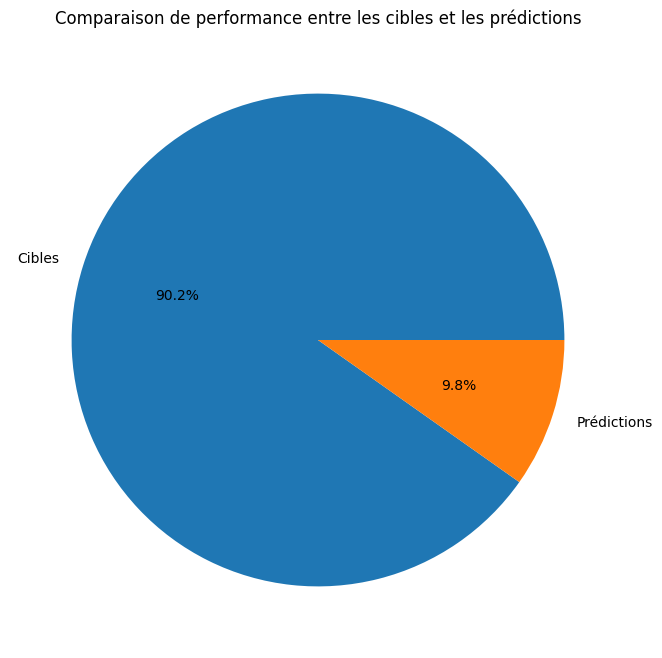

In [21]:
# Calcul des pourcentages de prédictions et de cibles correctes
correct_targets = [1 if targets[i] == predictions[i] else 0 for i in range(len(targets))]
correct_percent_targets = sum(correct_targets)/len(targets) * 100
correct_percent_predictions = wer_score

# Création du graphique
fig, ax = plt.subplots(figsize=(8,8))
ax.pie([correct_percent_targets, correct_percent_predictions], labels=["Cibles", "Prédictions"], autopct='%1.1f%%')
ax.set_title("Comparaison de performance entre les cibles et les prédictions")
plt.show()

Cette fonction permet de générer une matrice de confusion et de la représenter graphiquement à l'aide de la bibliothèque matplotlib. 

La matrice de confusion est une table qui permet d'évaluer la performance d'un modèle de classification en comparant les prédictions de ce modèle avec les vraies étiquettes (labels) des données de test. Elle permet de visualiser le nombre de prédictions correctes (diagonale principale de la matrice) et les erreurs de classification (hors diagonale).

 La fonction peut également normaliser la matrice si l'argument normalize est True, afin de mieux visualiser la proportion d'erreurs pour chaque classe.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Ce code évalue les performances d'un modèle sur un ensemble de données de validation à l'aide de métriques de précision et de score F1.

Tout d'abord, il crée deux listes vides pour les prédictions et les cibles. Ensuite, pour chaque lot de l'ensemble de données de validation, il effectue des prédictions à l'aide du modèle et les décode à l'aide de la decode_batch_predictionsfonction. Il convertit les prédictions décodées en valeurs numériques et les ajoute à la liste des prédictions. Il ajoute également la représentation numérique des étiquettes de vérité terrain à la liste des cibles.

Ensuite, il définit une liste d'étiquettes représentant les caractères du jeu de données. Ensuite, il crée une matrice de confusion à l'aide de confusion_matrixla fonction de la bibliothèque scikit-learn en transmettant les cibles et les prédictions avec la liste des étiquettes.

Enfin, il calcule les métriques de précision et de score F1 à l'aide des fonctions precision_scoreet f1_scorede la bibliothèque scikit-learn avec le averageparamètre défini sur 'macro', qui calcule la métrique globalement en traitant toutes les classes de la même manière. Les résultats sont ensuite imprimés sur la console.

In [23]:
from sklearn.metrics import confusion_matrix, precision_score, f1_score

# Create predictions and targets
predictions = []
targets = []
for batch in validation_dataset:
    X, y = batch
    batch_predictions = model.predict(X)
    batch_predictions = decode_batch_predictions(batch_predictions)
    predictions.extend([char_to_num(c) for c in batch_predictions]) # Convert predictions to numeric
    targets.extend([char_to_num(tf.strings.reduce_join(tf.strings.as_string(label)).numpy().decode('utf-8')) for label in y.numpy()])

# Define labels
labels = list(range(len(characters)))

# Create confusion matrix
cm = confusion_matrix(targets, predictions, labels=labels)
print("-" * 100)
print("Confusion Matrix")
print(cm)

# Calculate precision and F1-score
precision = precision_score(targets, predictions, average='macro')
f_score = f1_score(targets, predictions, average='macro')
print("-" * 100)
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f_score:.4f}")



1/1 [==============================] - 0s 162ms/step
----------------------------------------------------------------------------------------------------
Confusion Matrix
[[500   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0

Ce code est destiné à tracer une matrice de confusion pour un modèle de classification. La matrice de confusion est une représentation visuelle de la performance du modèle, qui montre le nombre de fois que chaque classe a été prédite correctement ou incorrectement.

La fonction plot_confusion_matrix prend en entrée une matrice de confusion cm, un tableau de chaînes de caractères représentant les différentes classes characters, un booléen normalize pour spécifier si la matrice doit être normalisée ou non, et un titre pour la matrice.

La commande plt.figure(figsize=(10, 10)) crée une nouvelle figure de taille 10x10 pouces pour afficher la matrice de confusion.

Enfin, la fonction plt.show() affiche la figure finale contenant la matrice de confusion.

<ipython-input-22-fc5ee0626ec7>:13: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


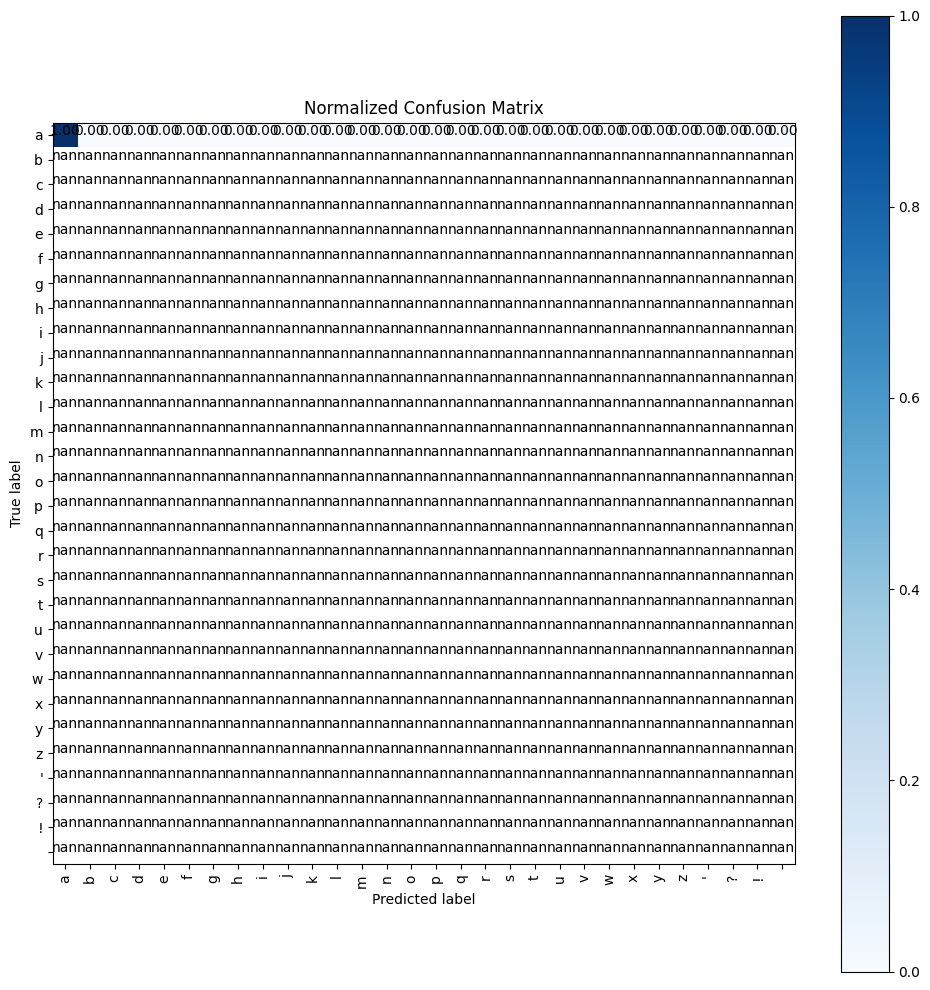

In [24]:
# Plot confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cm, classes=characters, normalize=True, title='Normalized Confusion Matrix')
plt.show()

Ce code évalue les performances du modèle en calculant les vrais positifs (TP), vrais négatifs (TN), faux positifs (FP) et faux négatifs (FN) pour chaque classe du modèle. Les TP, TN, FP et FN sont calculés à partir de la matrice de confusion cm, qui doit avoir été calculée précédemment.

Le code boucle sur les données de validation validation_dataset et pour chaque lot (batch), il fait des prédictions en utilisant le modèle et les transforme en chaînes de caractères à l'aide de la fonction decode_batch_predictions. Les prédictions et les étiquettes sont ensuite converties en valeurs numériques à l'aide de la fonction char_to_num. Les TP, TN, FP et FN sont ensuite calculés pour chaque classe en utilisant les valeurs numériques prédites et les étiquettes réelles.

Le tableau de correspondance num_to_char est obtenu à partir de la table de recherche de chaînes de caractères (StringLookup) utilisée pour convertir les chaînes de caractères en valeurs numériques.

Enfin, le code affiche les TP, TN, FP et FN pour chaque classe.

In [25]:
from tensorflow.keras.layers import StringLookup

predictions = []
targets = []
for batch in validation_dataset:
    X, y = batch
    batch_predictions = model.predict(X)
    batch_predictions = decode_batch_predictions(batch_predictions)
    predictions.extend([char_to_num(c) for c in batch_predictions]) # Convert predictions to numeric
    targets.extend([char_to_num(tf.strings.reduce_join(tf.strings.as_string(label)).numpy().decode('utf-8')) for label in y.numpy() if len(label)>0]) # Skip empty labels

# Define true positives, true negatives, false positives, false negatives for each class
tp = {}
tn = {}
fp = {}
fn = {}
for i, label_i in enumerate(labels):
    tp[label_i] = cm[i, i]
    tn[label_i] = np.sum(cm) - tp[label_i] - np.sum(cm[i, :]) - np.sum(cm[:, i])
    fp[label_i] = np.sum(cm[:, i]) - tp[label_i]
    fn[label_i] = np.sum(cm[i, :]) - tp[label_i]

char_lookup_table = StringLookup(
    vocabulary=characters, mask_token=None, num_oov_indices=0, output_mode='int'
)


# Extract characters from the StringLookup table
num_to_char = char_lookup_table.get_vocabulary()

# Print true positives, true negatives, false positives, false negatives for each class
print("-" * 100)
print("True Positives, True Negatives, False Positives, False Negatives for each class:")
for i, label_i in enumerate(labels):
    char_i = num_to_char[label_i]
    print(f"Class '{char_i}': TP={tp[label_i]}, TN={tn[label_i]}, FP={fp[label_i]}, FN={fn[label_i]}")


1/1 [==============================] - 0s 158ms/step
----------------------------------------------------------------------------------------------------
True Positives, True Negatives, False Positives, False Negatives for each class:
Class 'a': TP=500, TN=-1000, FP=0, FN=0
Class 'b': TP=0, TN=500, FP=0, FN=0
Class 'c': TP=0, TN=500, FP=0, FN=0
Class 'd': TP=0, TN=500, FP=0, FN=0
Class 'e': TP=0, TN=500, FP=0, FN=0
Class 'f': TP=0, TN=500, FP=0, FN=0
Class 'g': TP=0, TN=500, FP=0, FN=0
Class 'h': TP=0, TN=500, FP=0, FN=0
Class 'i': TP=0, TN=500, FP=0, FN=0
Class 'j': TP=0, TN=500, FP=0, FN=0
Class 'k': TP=0, TN=500, FP=0, FN=0
Class 'l': TP=0, TN=500, FP=0, FN=0
Class 'm': TP=0, TN=500, FP=0, FN=0
Class 'n': TP=0, TN=500, FP=0, FN=0
Class 'o': TP=0, TN=500, FP=0, FN=0
Class 'p': TP=0, TN=500, FP=0, FN=0
Class 'q': TP=0, TN=500, FP=0, FN=0
Class 'r': TP=0, TN=500, FP=0, FN=0
Class 's': TP=0, TN=500, FP=0, FN=0
Class 't': TP=0, TN=500, FP=0, FN=0
Class 'u': TP=0, TN=500, FP=0, FN=0
Class

/usr/local/lib/python3.9/dist-packages/numpy/core/numeric.py:2449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


Il s'agit d'un extrait de code Python qui utilise la bibliothèque Matplotlib pour créer un graphique à barres indiquant le nombre de vrais positifs, de vrais négatifs, de faux positifs et de faux négatifs pour chaque classe.
 
Le code parcourt une liste d'étiquettes et récupère les nombres correspondants de chaque type de classification (TP, TN, FP et FN) pour chaque étiquette. Il trace ensuite chaque décompte sous forme de barre sur le graphique, avec différentes couleurs indiquant chaque type de classification. Le graphique est étiqueté avec un titre, une étiquette d'axe des x, une étiquette d'axe des y et une légende. Enfin, le graphique est affiché à l'aide de la fonction "plt.show()".

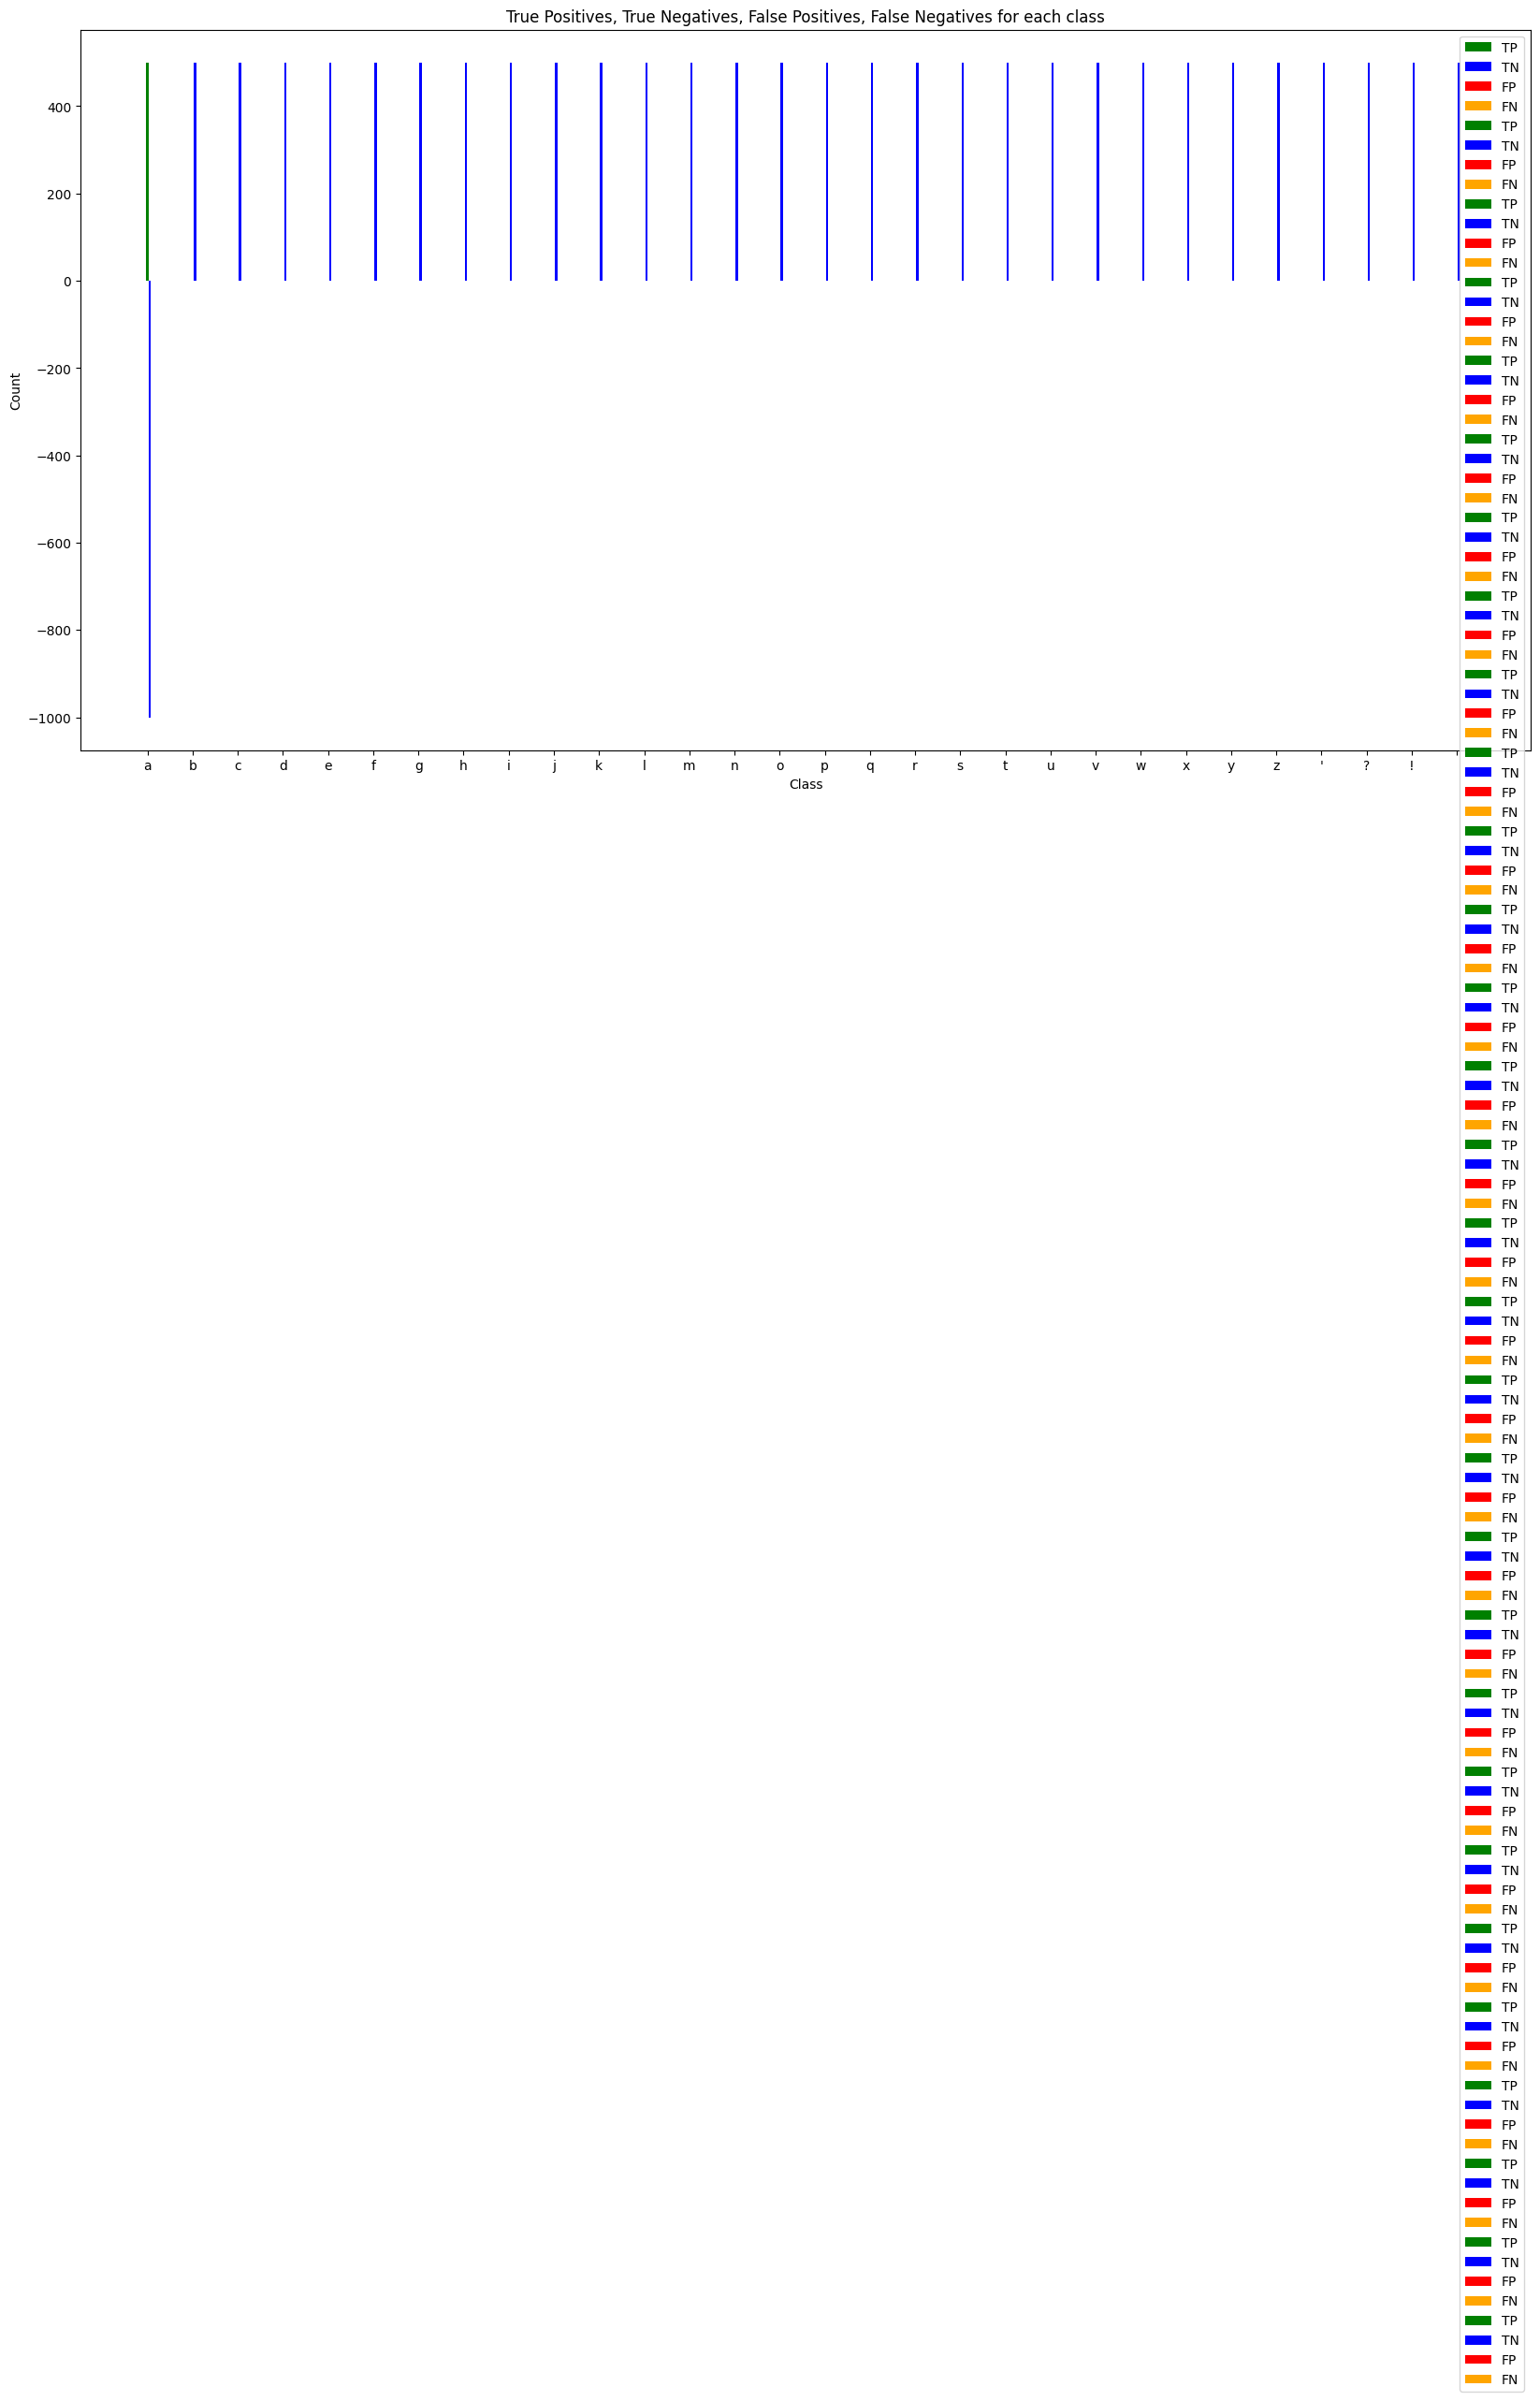

In [26]:
import matplotlib.pyplot as plt

# Plot true positives, true negatives, false positives, false negatives for each class
fig, ax = plt.subplots(figsize=(20,10))
bar_width = 0.2

for i, label_i in enumerate(labels):
    char_i = num_to_char[label_i]
    x = i * 4
    ax.bar(x, tp[label_i], width=bar_width, color='green', label='TP')
    ax.bar(x + bar_width, tn[label_i], width=bar_width, color='blue', label='TN')
    ax.bar(x + bar_width * 2, fp[label_i], width=bar_width, color='red', label='FP')
    ax.bar(x + bar_width * 3, fn[label_i], width=bar_width, color='orange', label='FN')
    
ax.set_title('True Positives, True Negatives, False Positives, False Negatives for each class')
ax.set_xticks(range(0, len(labels) * 4, 4))
ax.set_xticklabels([num_to_char[label_i] for label_i in labels])
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.legend()
plt.show()



sauvgarder modéle sous forme de h5

In [27]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Colab Notebooks/voice_in_typing.h5')